# Developping a Simple Perceptron Algorithme from Scratch

## Objective and Context

Based on the given code snippet and dataset, the context of the project appears to be predicting gender based on the provided features ("Anime %," "Shopping %," and "Football %"). The goal is to develop a machine learning model or algorithm that can learn from the given dataset and accurately predict the gender (i.e., "boy" or "girl") of new individuals based on their values for the three input features. By training a predictive model on this dataset, the project aims to create a system that can make gender predictions for individuals based on their preferences in anime, shopping, and football-related activities.

## Features

- "Anime %": Level of interest in anime.
- "Shopping %": Shopping activity.
- "Football %": Involvement in football-related activities.

## Python Libraries 

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display, Math, Markdown
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Data Source

In [2]:
ltx = lambda x: display(Math(x))
dis = lambda x : pd.DataFrame(x)

# Input data (features)

boys_play_football = np.random.normal(loc=0.63, scale=0.1, size=40)
boys_watch_anime = np.random.normal(loc=0.4, scale=0.1, size=40)
girls_shop = np.random.normal(loc=0.7, scale=0.1, size=40)
girls_play_football = np.random.normal(loc=0.5, scale=0.1, size=40)
girls_watch_anime = np.random.normal(loc=0.38, scale=0.1, size=40)
boys_shop = np.random.normal(loc=0.5, scale=0.1, size=40)

boys_data = np.column_stack((boys_play_football, boys_watch_anime, boys_shop))
girls_data = np.column_stack((girls_play_football, girls_watch_anime, girls_shop))


## Data Integration

In [3]:
# Create a dataframe
boys_df = pd.DataFrame(boys_data, columns=["Football %", "Anime %", "Shopping %"])
boys_df['Gender'] = "boy"
girls_df = pd.DataFrame(girls_data, columns=["Football %", "Anime %", "Shopping %"])
girls_df['Gender'] = "girl"

# Concatenate the DataFrames randomly
df = pd.concat([boys_df, girls_df], ignore_index=True)

# Shuffle the rows randomly
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


## Data Vizualisation

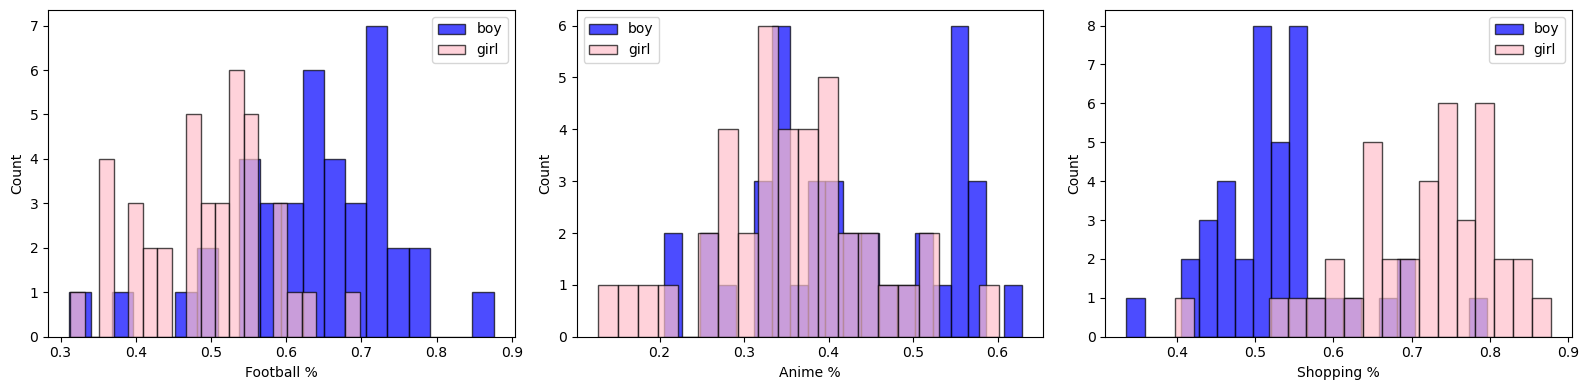

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns)-1, figsize=(16, 4))

colors = ['blue', 'pink']  # Specify colors for boys and girls

for i, column in enumerate(df.columns[:-1]):
    ax = axes[i]
    for gender, color in zip(['boy', 'girl'], colors):
        ax.hist(df[df['Gender'] == gender][column],
                bins=20, label=gender, color=color, edgecolor='black', alpha=0.7)
    ax.set_xlabel(column)
    ax.set_ylabel("Count")
    ax.legend()

plt.tight_layout()
plt.show()


## Statistics

In [5]:
df.shape

(80, 4)

In [6]:
df.mean()

C:\Users\P52s\AppData\Local\Temp\ipykernel_14660\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Football %    0.496818
Anime %       0.305087
Shopping %    0.595085
dtype: float64

In [7]:
df.std()

C:\Users\P52s\AppData\Local\Temp\ipykernel_14660\3390915376.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


Football %    0.332926
Anime %       0.133984
Shopping %    0.138988
dtype: float64

## Train-Test Splitting

In [8]:
# Train-test split
X = df.drop("Gender", axis=1)
y = df["Gender"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display train dataframe with labels
train_df = pd.concat([X_train, y_train], axis=1)
train_dflb = train_df
train_dflb["Gender"] = train_dflb["Gender"].map({"boy": 0, "girl": 1})
train_dflb = train_dflb.astype({"Gender": int})
train_dflb["Gender"] = train_dflb["Gender"].map({0: "boy", 1: "girl"})
display(Markdown("### Train Data"))
display(train_dflb)

# Display test dataframe with labels
test_df = pd.concat([X_test, y_test], axis=1)
test_dflb =test_df 
test_dflb["Gender"] = test_df["Gender"].map({"boy": 0, "girl": 1})
test_dflb = test_dflb.astype({"Gender": int})
test_dflb["Gender"] = test_dflb["Gender"].map({0: "boy", 1: "girl"})
display(Markdown("### Test Data"))
display(test_dflb)
y_train=train_df["Gender"].values
y_test=test_df["Gender"]

### Train Data

,Football %,Anime %,Shopping %,Gender
73,0.958807,0.159652,0.640152,boy
61,0.817965,0.155705,0.404396,boy
55,0.872566,0.327615,0.342209,boy
40,0.239547,0.302497,0.861186,girl
9,0.699647,0.266544,0.342174,boy
...,...,...,...,...
20,0.765606,0.275430,0.300540,boy
60,0.118445,0.459512,0.628030,girl
71,0.771354,0.283640,0.546883,boy
14,0.109009,0.389796,0.727952,girl


### Test Data

,Football %,Anime %,Shopping %,Gender
30,0.485811,0.362982,0.784927,girl
0,0.793532,0.243779,0.476364,boy
22,0.732711,0.139024,0.674493,boy
31,0.135798,0.378690,0.527010,girl
18,0.219630,0.281951,0.613009,girl
28,0.714985,0.045449,0.475994,boy
10,0.018943,0.361532,0.801979,girl
70,0.146345,0.221585,0.720524,girl
4,0.836826,0.285623,0.602829,boy
12,0.145430,0.611756,0.802559,girl


## Parameters Tunning

In [156]:
np.random.seed(42)
weights = np.random.rand(1, 3)
bias = np.random.rand(1)
weights

array([[0.37454012, 0.95071431, 0.73199394]])

In [157]:
w = r' \begin{bmatrix} ' + ' \ \ , \  \ '.join([f'{w[0]:0.4}' for w in weights]) + r' \end{bmatrix}^t'
ltx(r'Z = ' + w+ r'X + ' +  f'{bias[0]:0.4}' )
ltx(r'A = sigmoid(z)')
ltx(r'Y = A')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Activation Function

In [158]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

## Hyperparameter Tunning

In [159]:
# Training loop
epochs = 80
learning_rate = 0.1

## Trainning Loop

In [162]:
for epoch in range(epochs) :
    # Frontpropagation
    z = np.dot(X_train,weights.T) + bias
    out = sigmoid(z)

    # Backpropagation
    err=out.T - y_train
    d_weights = np.dot(err, X_train)
    d_bias = np.sum(err)


    # Update weights and bias
    weights = weights.T- learning_rate * d_weights
    bias -= learning_rate * d_bias

## Prediction

In [164]:
z = np.dot(X_test, weights.T) + bias
predictions = sigmoid(z)
rounded_predictions = np.round(predictions)

# Print the predictions
for i, data in enumerate(y_test):
    predicted_label = "girl" if rounded_predictions[i][0] == 1 else "boy"
    print(f"Input: {data}, Predicted: {predicted_label}")


Input: 1, Predicted: boy
Input: 0, Predicted: boy
Input: 0, Predicted: boy
Input: 1, Predicted: boy
Input: 1, Predicted: boy
Input: 0, Predicted: boy
Input: 1, Predicted: boy
Input: 1, Predicted: boy
Input: 0, Predicted: boy
Input: 1, Predicted: boy
Input: 1, Predicted: boy
Input: 1, Predicted: boy
Input: 0, Predicted: boy
Input: 0, Predicted: boy
Input: 0, Predicted: boy
Input: 1, Predicted: boy


In [5]:
# Load the saved model
model = GenderPredictionModel()
model.load_state_dict(torch.load("gender_prediction_model.pt"))
model.eval()  # Set the model to evaluation mode

# Convert data to PyTorch tensor
X = torch.Tensor(df.drop("Gender", axis=1).values)

# Make predictions
with torch.no_grad():
    predictions = model(X)
    rounded_predictions = torch.round(predictions)

# Print the predictions
for i, data in enumerate(df["Gender"]):
    predicted_label = "girl" if rounded_predictions[i] == 1 else "boy"
    print(f"Input: {data}, Predicted: {predicted_label}")


NameError: name 'GenderPredictionModel' is not defined